In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:

# Train data
train_x = np.loadtxt("../Data/trn_x.txt")
train_x_label = np.loadtxt("../Data/trn_x_class.txt")

train_y = np.loadtxt("../Data/trn_y.txt")
train_y_label = np.loadtxt("../Data/trn_y_class.txt")

# Test data
test_x = np.loadtxt("../Data/tst_x.txt")
test_x_label = np.loadtxt("../Data/tst_x_class.txt")

test_y = np.loadtxt("../Data/tst_y.txt")
test_y_label = np.loadtxt("../Data/tst_y_class.txt")

test_y_126 = np.loadtxt("../Data/tst_y_126.txt")
test_y_126_label = np.loadtxt("../Data/tst_y_126_class.txt")

test_xy = np.loadtxt("../Data/tst_xy.txt")
test_xy_label = np.loadtxt("../Data/tst_xy_class.txt")

test_xy_126 = np.loadtxt("../Data/tst_xy_126.txt")
test_xy_126_label = np.loadtxt("../Data/tst_xy_126_class.txt")

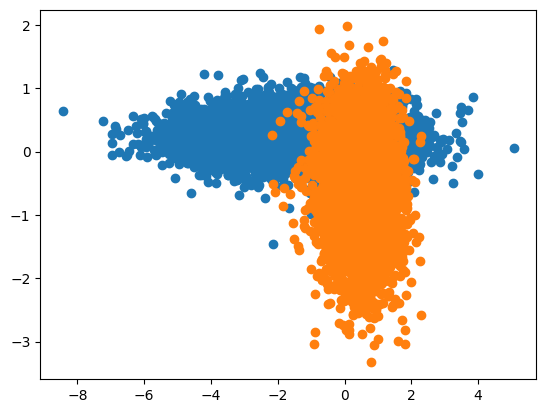

In [4]:
plt.scatter(train_x[:, 0], train_x[:, 1])
plt.scatter(train_y[:, 0], train_y[:, 1])

plt.show()

In [5]:
# x statistics
train_x_mean = train_x.mean(axis=0)
train_x_cov = np.cov(train_x, rowvar=False)
print(train_x_cov)

# y statistics
train_y_mean = train_y.mean(axis=0)
train_y_cov = np.cov(train_y, rowvar=False)
print(train_y_cov)

x_length = np.shape(train_x)[0]
y_length = np.shape(train_y)[0]

# priors
prior_x = x_length / (x_length + y_length)
prior_y = y_length / (x_length + y_length)

print(prior_x)
print(prior_y)

[[ 2.67373236 -0.00766618]
 [-0.00766618  0.07231472]]
[[ 0.32252417 -0.02634358]
 [-0.02634358  0.52652025]]
0.5543040368330182
0.44569596316698185


In [24]:
def likelihood(data, mean, cov):
        a = -0.5 * np.matmul((data - mean), np.linalg.inv(cov))
        b = np.matmul(a,(data - mean))
        likelihood = (1 / (2 * np.pi)) * (1 / (np.linalg.det(cov) ** (1/2)) * np.exp(b))
        return(likelihood)


In [26]:
def posterior(data, target):
    if target == 1:
        posterior = (likelihood(data, train_x_mean, train_x_cov) * prior_x) / ((likelihood(data, train_x_mean, train_x_cov) * prior_x) + (likelihood(data, train_y_mean, train_y_cov) * prior_y))
    else:
        posterior = (likelihood(data, train_y_mean, train_y_cov) * prior_y) / ((likelihood(data, train_x_mean, train_x_cov) * prior_x) + (likelihood(data, train_y_mean, train_y_cov) * prior_y))
    return(posterior)
    

In [27]:
for i in test_x:
    print(posterior(i, 1))


0.9999431572061616
0.9985203092182479
0.9178748902463975
0.3857327931089684
0.8848645266709957
0.9794701673560223
0.9999372016474355
0.9924020890176173
0.9999999903116589
0.9998315754668725
0.8828052851511304
0.9996626454222066
0.9143275840204004
0.9999978049955828
0.999999999999628
0.9999999999999967
0.5352112163849112
1.0
0.9925345357914088
0.9999726726111008
0.8180567663329091
0.9999987840788715
0.9999012795692039
0.602668071337332
0.9999772587447586
0.9538793162116199
0.9067980485597191
0.45339705258456664
0.9998959588899963
0.9774355876075348
0.5184495316780264
0.9999871808448082
1.0
0.9999722936301297
0.36391674563346904
0.9832592468399581
0.9999999999999989
0.9999999899936347
0.9552450182231454
0.9953809031617983
0.9999999934320545
0.9999971486194418
0.9991979826636557
0.9999664888903627
0.9999286681845
0.9999897838470763
0.9997930359213887
0.9992367154965679
0.5939156657530278
0.9937127025370733
0.602113659706951
0.9999999999997088
0.9990187589851989
0.9999999990858721
0.622155

C:\Users\vismi\AppData\Local\Temp\ipykernel_11108\344012750.py:3: RuntimeWarning: invalid value encountered in scalar divide
  posterior = (likelihood(data, train_x_mean, train_x_cov) * prior_x) / ((likelihood(data, train_x_mean, train_x_cov) * prior_x) + (likelihood(data, train_y_mean, train_y_cov) * prior_y))


0.9999991106389888
0.8586416351216777
0.9749460663481002
0.9813482414815751
0.9826581915711182
1.0
0.9999595362874633
0.9999997434405907
0.5877488534422546
0.9927607790279918
0.9999970778266694
1.0
0.9330767881849702
0.5043547225251416
0.9999997985747294
0.9981345645551732
0.9874895596633662
0.9999996666022759
0.999463697740498
0.9999999616497355
0.9999182551913979
0.9126652126335689
0.9909986880989178
0.9999999840732112
0.999996779651191
0.6637923711162207
0.9999999999979231
0.9999056470978923
0.6501026443725535
0.9999993391894461
0.9999154980258488
0.8238782497053305
0.9429983520251479
0.9999999998861365
0.9931923132542988
0.9999999999998691
0.9883214409138699
0.9990985285524389
0.9999880284082397
0.9999998544512596
0.975557624600579
0.9078366387205379
0.9999999922038649
0.9999753254302377
1.0
0.9999994064071029
0.8818823582243117
0.9995800365457634
0.30972606993593027
0.9724186916782788
0.999999999255157
0.9999999999999748
1.0
0.7172549755801114
0.9824036170929027
0.9999430462474711